In [6]:
import pandas as pd

df = pd.read_csv('/home/toefl/K/MCTS/dataset/train.csv')

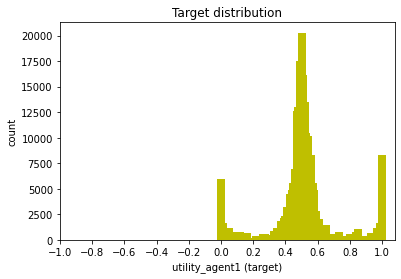

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(*np.unique(df['AdvantageP1'].to_numpy(), return_counts=True), width=0.05, color='y')
plt.xlabel('utility_agent1 (target)')
plt.ylabel('count')
plt.xticks(np.linspace(-1, 1, 11))
plt.title('Target distribution')
plt.show()

In [48]:
df = df[df["LudRules"].apply(lambda x: "start" in x)]

In [50]:
df["LudRules"].tolist()[10]

'(game "1D Chess" (players 2) (equipment { (board (rectangle 1 8)) (piece "Rook" Each (move Slide Orthogonal (to if:(is Enemy (who at:(to))) (apply (remove (to)))) ) ) (piece "King" Each (move Step (to if:(not (is Friend (who at:(to)))) (apply (if (is Enemy (who at:(to))) (remove (to)))) ) ) ) (piece "Knight" Each (move Leap { { F F } } (to if:(not (is Friend (who at:(to)))) (apply (if (is Enemy (who at:(to))) (remove (to)))) ) ) ) } ) (rules (start { (place "Rook1" coord:"C1") (place "Knight1" coord:"B1") (place "King1" coord:"A1") (place "Rook2" coord:"F1") (place "Knight2" coord:"G1") (place "King2" coord:"H1") } ) (play (do (forEach Piece) ifAfterwards:(not (is Threatened (id "King" Mover))) ) ) (end { (if (and (is Threatened (id "King" Next)) (not (can Move (do (forEach Piece Next) ifAfterwards:(not (is Threatened (id "King" Next)) ) ) ) ) ) (result Mover Win) ) (if (or (no Moves Mover) (= (counter) 100)) (result Mover Draw) ) } ) ) )'

In [21]:
df.value_counts()

Series([], dtype: int64)

In [16]:
f = pd.read_csv('/home/toefl/K/MCTS/dataset/feature_importance.csv')

In [52]:
f[f["feature"] == "src_AdvantageP1"]

,Unnamed: 0,feature,importance
457,587,src_AdvantageP1,0.019873


In [2]:
import pickle
with open('catcols.pickle', 'rb') as file:
    catcols = pickle.load(file)

In [3]:
print(catcols)

['src_p1_selection', 'src_p1_exploration', 'src_p1_playout', 'src_p1_bounds', 'src_p2_selection', 'src_p2_exploration', 'src_p2_playout', 'src_p2_bounds', 'src_agent1', 'src_agent2']


In [ ]:
            # X_train = X_train.rename(columns={"src_Balance": "Balance"})
            # X_valid_src = X_valid_src.rename(columns={"src_Balance": "Balance"})
            # X_valid_tta = X_valid_tta.rename(columns={"src_Balance": "Balance"})

In [22]:
f.head(50)

,Unnamed: 0,feature,importance
0,592,src_p2_selection,4.742315
1,588,src_p1_selection,4.573575
2,594,src_p2_playout,3.547631
3,590,src_p1_playout,3.256589
4,710,autoFE_f_112,2.957773
5,596,src_agent1,2.612285
6,597,src_agent2,2.345239
7,417,DurationTurnsNotTimeouts,2.318736
8,585,PlayoutsPerSecond,1.824766
9,1066,autoFE_f_468,1.766051


In [15]:
df.shape

(233234, 814)

In [12]:
dfs = df.copy()

In [13]:
dft = dfs[(dfs["GameRulesetName"] == df["GameRulesetName"]) & (dfs["agent1"] == df["agent2"]) & (dfs["agent2"] == df["agent1"])]

In [14]:
dft.shape

(0, 814)

In [12]:

d1 = df["AdvantageP1"]
d2 = df["MoveDistanceMaxDecrease"]
d1.groupby(d2).rank(ascending=True, pct=True).nunique()

390

In [14]:
import pickle

with open('feature.pickle', 'rb') as file:
    feature = pickle.load(file)

In [16]:
feature[0].name

'GroupByThenRank'

In [27]:
import polars as pl

sub = pl.read_parquet('/home/toefl/K/MCTS/submission.parquet')

In [28]:
sub

Id,utility_agent1
i64,f64
233234,0.179138
233236,0.030618
233235,-0.188421


In [18]:
sub

Id,utility_agent1
i64,f64
233234,0.185311
233236,0.014517
233235,-0.185311


In [6]:
sub

Id,utility_agent1
i64,f64
233234,0.023419
233235,-0.028186
233236,0.00731


In [4]:
sub

Id,utility_agent1
i64,f64
233234,0.191369
233236,0.023886
233235,-0.191369


In [7]:
df["agent1"].nunique()

72

In [11]:
df["agent"] = df["agent1"] + "_" + df["agent2"] 

In [14]:
df[["agent", "utility_agent1"]].groupby("agent").mean().sort_values(by="utility_agent1").to_csv('dataset/avg.csv')

In [15]:
df[["GameRulesetName", "utility_agent1"]].groupby("GameRulesetName").mean().sort_values(by="utility_agent1").to_csv('dataset/avg_game.csv')

In [26]:
oof_labels = artifacts["catboost"]["oof_labels"]
oof_preds = artifacts["catboost"]["oof_preds"]

oof_preds_fixed = oof_preds.copy()
oof_preds_fixed[df["GameTreeComplexity"] == 0] = 2 * df[df["GameTreeComplexity"] == 0]["src_AdvantageP1"] - 1

In [25]:
oof_labels[:5]

array([-0.46666667, -0.33333333, -0.06666667, -0.33333333, -0.33333333])

In [28]:
mean_squared_error(oof_labels, oof_preds_fixed, squared=False)

0.40186378136362766

In [14]:
import pickle
with open('solver_checkpoint.pickle', 'rb') as file:
    data = pickle.load(file)

In [16]:
oof_labels = data["catboost"]["oof_labels"]
oof_preds = data["catboost"]["oof_preds"]

KeyError: 'oof_label'

In [10]:
slc = df[df["GameTreeComplexity"] == 0][["AdvantageP1", "utility_agent1"]]
mse = abs(slc["AdvantageP1"] - (slc["utility_agent1"] + 1) / 2)

In [13]:
mse.mean()

0.0384825327510917

In [10]:
for f in df.columns.tolist():
    if 'src' in f:
        print(f)

In [1]:
df["utility_agent1"].nunique()

NameError: name 'df' is not defined

In [13]:
import pickle

with open('feature.pickle', 'rb') as file:
    feature = pickle.load(file)

In [15]:
print(len(feature))

15924


In [19]:
import sys
sys.path.append('/home/toefl/K/MCTS/dataset/')
import kaggle_evaluation.mcts_inference_server

In [ ]:
        # m = {}
        # for i, u in enumerate(Y.unique()):
        #     m[u] = i
        # Y = Y.map(m)

In [ ]:
        # # Custom features.

        # df = df.with_columns([
        #     (pl.col('PlayoutsPerSecond') / (pl.col('MovesPerSecond') + 1e-15)).alias('Playouts/Moves'),
        #     (pl.col('MovesPerSecond') / (pl.col('PlayoutsPerSecond') + 1e-15)).alias('EfficiencyPerPlayout'),
        #     (pl.col('DurationActions') / (pl.col('DurationTurnsStdDev') + 1e-15)).alias('TurnsDurationEfficiency'),
        #     (pl.col('DurationActions') / (pl.col('MovesPerSecond') + 1e-15)).alias('ActionTimeEfficiency'),
        #     (pl.col('DurationTurnsStdDev') / (pl.col('DurationActions') + 1e-15)).alias('StandardizedTurnsEfficiency'),
        #     (pl.col('DurationActions') / (pl.col('StateTreeComplexity') + 1e-15)).alias('DurationToComplexityRatio'),
        #     (pl.col('GameTreeComplexity') / (pl.col('StateTreeComplexity') + 1e-15)).alias('NormalizedGameTreeComplexity'),
        #     (pl.col('Balance') * pl.col('GameTreeComplexity')).alias('ComplexityBalanceInteraction'),
        #     (pl.col('StateTreeComplexity') + pl.col('GameTreeComplexity')).alias('OverallComplexity'),
        #     (pl.col('GameTreeComplexity') / (pl.col('PlayoutsPerSecond') + 1e-15)).alias('ComplexityPerPlayout'),
        #     (pl.col('DurationTurnsNotTimeouts') / (pl.col('MovesPerSecond') + 1e-15)).alias('TurnsNotTimeouts/Moves'),
        #     (pl.col('Timeouts') / (pl.col('DurationActions') + 1e-15)).alias('Timeouts/DurationActions'),
        #     (pl.col('StepDecisionToEnemy') + pl.col('SlideDecisionToEnemy') + pl.col('HopDecisionMoreThanOne')).alias('ComplexDecisionRatio'),
        #     (pl.col('StepDecisionToEnemy') + 
        #      pl.col('HopDecisionEnemyToEnemy') + 
        #      pl.col('HopDecisionFriendToEnemy') + 
        #      pl.col('SlideDecisionToEnemy')).alias('AggressiveActionsRatio'),

        #     (pl.col('src_AdvantageP1') / (pl.col('Balance') + 1e-15)).alias('src_AdvantageBalanceRatio'),
        #     (pl.col('src_AdvantageP1') / (pl.col('DurationActions') + 1e-15)).alias('src_AdvantageTimeImpact'),
        #     (pl.col('OutcomeUniformity') / (pl.col('src_AdvantageP1') + 1e-15)).alias('src_OutcomeUniformity/AdvantageP1'),

        #     (pl.col('tta_AdvantageP1') / (pl.col('Balance') + 1e-15)).alias('tta_AdvantageBalanceRatio'),
        #     (pl.col('tta_AdvantageP1') / (pl.col('DurationActions') + 1e-15)).alias('tta_AdvantageTimeImpact'),
        #     (pl.col('OutcomeUniformity') / (pl.col('tta_AdvantageP1') + 1e-15)).alias('tta_OutcomeUniformity/AdvantageP1'),
        # ])

In [ ]:
# Y_train = Y_train.astype(np.float64)
#             X[src_columns].to_csv('Xtrain.csv')
#             Y.to_csv('Ytrain.csv')

#             print('here')

#             ofe = OpenFE()
#             features = ofe.fit(data=X_train, label=Y_train.astype(np.float64))
#             print(features)
#             train_x, _ = transform(X_train, X_valid, features)
#             train_x.to_csv('features.csv')